<a href="https://colab.research.google.com/github/JS-DS-coder/Algoritmos/blob/main/proyecto_final_SL2_problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final 
# Statistical Learning II
Jairo O. Salazar
Carnet:



# Parte 1 - Feed Forward Network

**Heart Failure Prediction**

Aunque no soy medico, este problema me interesa bastante, ya que mi padre fallecio en 2018 de un ataque cardiaco aun habiendolo internado dias antes, tengo la impresion que los examenes que le practicaron fueron insuficientes para detectar a tiempo la dolencia. 

Las enfermedades Cardiovasculares son la causa no. 1 de muerte globalmente, y se estima que mueren 17.9 millones de personas cada año alrededor del mundo, el 31% de estas personas se estima es por un ataque al corazon.

El datase a analizar contiene 12 caracteristicas que son usadas para predecir la mortalidad por un fallo cardiaco.

Las personas con una enfermedad cardiovascular o que tienen un alto riesgo de padecer una enfermedad debido a la presencia de factores como la hipertension, diabetes y hyperlimidaemia) necesitan deteccion temprana y aca es donde el machine learning puede ser de gran ayuda.

Este sera un problema de clasificacion, en base a 12 caracteristicas poder predecir si se esta en riesgo de un evento mortal o no. Las 12 caracteristicas contenidas en el dataset son las siguientes:

1. *Edad :* Edad del paciente
2. *Creatinina phosphokinasea:* Es una enzima producida por el cuerpo. Un nivel alto de esta enzima puede indicar daño o estress al tejido muscular, el corazon o el cerebro.
3. *Diabetes: * Presencia de Diabetes es un factor de riesgo cardiaco muy comun.
4. *ejection fraction:* Es una medida que expresa el porcentaje de cuanda sangre puede el ventriculo izquierdo empujar afuera del corazon con cada contraccion.

5. *presion arterial alta: * Es un indicador si el paciente presenta presion arterial alta.

6. *platelets: * numero de plaquetas presentes en la sangre.

7. *Serum Creatinina: * Es una medida de que tan bien el higado esta limpieando la sangre. Mientras menor sea este valor mejor.

8. *Serum Sodium: * Es un test para determinar que tanto sodio tenemos en la sangre, es particularmente importante para los nervios y la funcion de los musculos.

9. *Sexo: * Hombre o mujer

10. *Smoking: * Fumador o no fumador.

11. *Anemia:*  deficiencia en el numero o calidad de los globulos rojos en el cuerpo.

12. *Time: * tiempo desde la ultima visita o evento cardiaco.


In [28]:
from keras import models
from keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [67]:
Dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
Dataset.columns = ['age','anaemia','creatinine_phosphokinasea','Diabetes','ejection_fraction','high_blood_pressure','platalets','serum_creatinine','serum_sodium','sex','smoking','time','Death_event']
Dataset.head()
#print(Dataset.shape)

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Preprocessing

- Revision de valores faltantes, revision de variables categoricas (vertorizacion).
- Normalizacion de valores

In [68]:
Dataset.isnull().sum()

#Revision de Datos faltantes ninguno.

age                          0
anaemia                      0
creatinine_phosphokinasea    0
Diabetes                     0
ejection_fraction            0
high_blood_pressure          0
platalets                    0
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                      0
time                         0
Death_event                  0
dtype: int64

In [69]:
#Value Normalization
datasetNorm = Dataset
for column in datasetNorm.columns:
    datasetNorm[column] = datasetNorm[column]  / datasetNorm[column].abs().max()
      
# view normalized data
display(datasetNorm)

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
0,0.789474,0.0,0.074036,0.0,0.2500,1.0,0.311765,0.202128,0.878378,1.0,0.0,0.014035,1.0
1,0.578947,0.0,1.000000,0.0,0.4750,0.0,0.309833,0.117021,0.918919,1.0,0.0,0.021053,1.0
2,0.684211,0.0,0.018573,0.0,0.2500,0.0,0.190588,0.138298,0.871622,1.0,1.0,0.024561,1.0
3,0.526316,1.0,0.014120,0.0,0.2500,0.0,0.247059,0.202128,0.925676,1.0,0.0,0.024561,1.0
4,0.684211,1.0,0.020354,1.0,0.2500,0.0,0.384706,0.287234,0.783784,0.0,0.0,0.028070,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.652632,0.0,0.007760,1.0,0.4750,1.0,0.182353,0.117021,0.966216,1.0,1.0,0.947368,0.0
295,0.578947,0.0,0.231523,0.0,0.4750,0.0,0.317647,0.127660,0.939189,0.0,0.0,0.950877,0.0
296,0.473684,0.0,0.262053,1.0,0.7500,0.0,0.872941,0.085106,0.932432,0.0,0.0,0.975439,0.0
297,0.473684,0.0,0.306958,0.0,0.4750,0.0,0.164706,0.148936,0.945946,1.0,1.0,0.982456,0.0


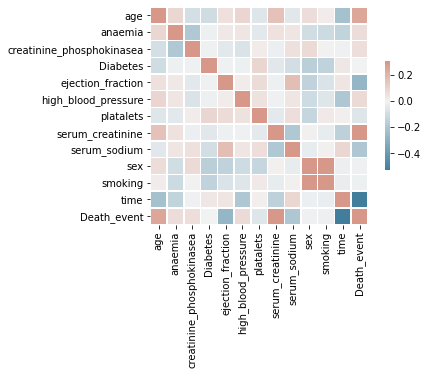

In [30]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(datasetNorm.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [31]:
datasetNorm.corr()

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinasea,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
Diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platalets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [88]:
model = models.Sequential()
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='relu'))
model.add(layers.Dense(2,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [82]:
model.build(input_shape=(299,12))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (299, 8)                  104       
_________________________________________________________________
dense_10 (Dense)             (299, 8)                  72        
_________________________________________________________________
dense_11 (Dense)             (299, 1)                  9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [72]:
y = pd.DataFrame(datasetNorm["Death_event"])
x = datasetNorm.drop('Death_event', inplace=True, axis=1)


In [77]:
x

In [89]:

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(datasetNorm, y, epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.7040 - accuracy: 0.3980
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5151
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5652
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5953
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6455
